# Pattern Pros
# Week 12
# Data Glacier Internship
### Random Forrest

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# preprocessing data
df_bank_full = pd.read_csv('bank-full.csv', delimiter=";", na_values="unknown")
df_bank_full
# transforming the education column
new_df = df_bank_full.replace("primary", 1)
new_df = new_df.replace("secondary", 2)
new_df = new_df.replace("tertiary", 3)

ed_mode = new_df["education"].mode()

# imputation
up_df = new_df
up_df["education"].fillna(2, inplace=True)

# transforming the job column
j_mode = up_df["job"].mode()

# imputation
up_df["job"].fillna("blue-collar", inplace=True)

# dropping the contact column and poutcome column
up_df = up_df.drop(columns=['contact', 'poutcome'])

# adding the is middle aged column
up_df['is_middle_aged'] = False
up_df.loc[up_df['age'] <=23 , 'is_middle_aged'] = True

# converting y to 0 or 1
up_df = up_df.replace('yes', 1)
up_df = up_df.replace('no', 0)

up_df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,is_middle_aged
0,58,management,married,3.0,0,2143,1,0,5,may,261,1,-1,0,0,False
1,44,technician,single,2.0,0,29,1,0,5,may,151,1,-1,0,0,False
2,33,entrepreneur,married,2.0,0,2,1,1,5,may,76,1,-1,0,0,False
3,47,blue-collar,married,2.0,0,1506,1,0,5,may,92,1,-1,0,0,False
4,33,blue-collar,single,2.0,0,1,0,0,5,may,198,1,-1,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3.0,0,825,0,0,17,nov,977,3,-1,0,1,False
45207,71,retired,divorced,1.0,0,1729,0,0,17,nov,456,2,-1,0,1,False
45208,72,retired,married,2.0,0,5715,0,0,17,nov,1127,5,184,3,1,False
45209,57,blue-collar,married,2.0,0,668,0,0,17,nov,508,4,-1,0,0,False


In [ ]:
# encoding
hot_df = pd.get_dummies(up_df)
hot_df

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3.0,0,2143,1,0,5,261,1,-1,...,0,0,0,0,0,0,1,0,0,0
1,44,2.0,0,29,1,0,5,151,1,-1,...,0,0,0,0,0,0,1,0,0,0
2,33,2.0,0,2,1,1,5,76,1,-1,...,0,0,0,0,0,0,1,0,0,0
3,47,2.0,0,1506,1,0,5,92,1,-1,...,0,0,0,0,0,0,1,0,0,0
4,33,2.0,0,1,0,0,5,198,1,-1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3.0,0,825,0,0,17,977,3,-1,...,0,0,0,0,0,0,0,1,0,0
45207,71,1.0,0,1729,0,0,17,456,2,-1,...,0,0,0,0,0,0,0,1,0,0
45208,72,2.0,0,5715,0,0,17,1127,5,184,...,0,0,0,0,0,0,0,1,0,0
45209,57,2.0,0,668,0,0,17,508,4,-1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
hot_df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'is_middle_aged',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [ ]:
X = hot_df.drop('y', axis = 1)
y = np.array(hot_df['y'])


In [ ]:
from sklearn.model_selection import train_test_split

# split into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)

In [ ]:
print('Training set:' + str(X_train.shape) + str(y_train.shape))
print('Testing set:' + str(X_test.shape) + str(y_test.shape))

Training set:(31647, 38)(31647,)
Testing set:(13564, 38)(13564,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50)

model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
# absolute errors
err = abs(y_pred - y_test)
print('Average Absolute Error:', round(np.mean(err), 2), 'degrees')

Average Absolute Error: 0.1 degrees


In [ ]:
from sklearn import metrics
# accuracy
print("Test Accuracy", metrics.accuracy_score(y_test, model.predict(X_test)),"\nTrain Accuracy", metrics.accuracy_score(y_train, model.predict(X_train)))

Test Accuracy 0.8992185196107343 
Train Accuracy 0.999715612854299


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix_simple_NN = confusion_matrix(y_test, y_pred)
confusion_matrix_simple_NN



array([[11630,   347],
       [ 1020,   567]])

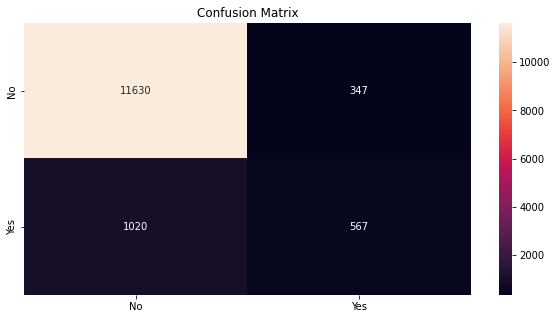

In [ ]:
## Classification Report
class_names = ['No',"Yes"]

plt.figure(figsize= (10,5))
c1 = sns.heatmap(confusion_matrix_simple_NN, annot=True, fmt="d",  xticklabels=class_names, yticklabels=class_names)
c1 = c1.set_title("Confusion Matrix")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11977
           1       0.62      0.36      0.45      1587

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564

